      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      total sulfur dioxide 

C:\Users\1011s\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


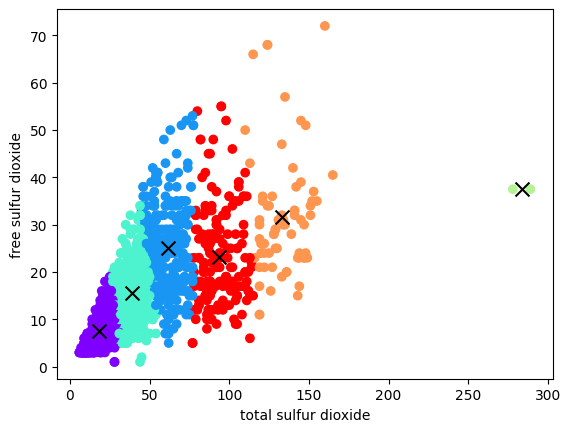

Các điểm trung tâm của các cụm:
Cụm 0: [ 8.62107023  0.51295987  0.28757525  2.42525084  0.08402174 18.48996656
  7.47826087  0.99663741  3.29968227  0.65379599 10.64225195]
Cụm 1: [ 8.23068966  0.51972414  0.27589655  2.40775862  0.09504828 61.69655172
 25.00689655  0.99689814  3.32413793  0.6852069  10.2995977 ]
Cụm 2: [ 8.23236607  0.52680804  0.24183036  2.39598214  0.0864442  38.95535714
 15.47433036  0.99668712  3.32897321  0.64770089 10.44363839]
Cụm 3: [7.9000e+00 3.0000e-01 6.8000e-01 8.3000e+00 5.0000e-02 2.8350e+02
 3.7500e+01 9.9316e-01 3.0100e+00 5.1000e-01 1.2300e+01]
Cụm 4: [8.02054795e+00 5.64178082e-01 3.10684932e-01 3.27123288e+00
 9.05890411e-02 1.33205479e+02 3.16095890e+01 9.97217534e-01
 3.24547945e+00 7.08767123e-01 9.76164384e+00]
Cụm 5: [7.82659574e+00 5.78297872e-01 2.60265957e-01 3.09680851e+00
 8.83510638e-02 9.36702128e+01 2.31117021e+01 9.96857872e-01
 3.31351064e+00 6.37074468e-01 1.01034574e+01]
Dự đoán cụm cho dữ liệu mới: 4


C:\Users\1011s\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\1011s\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\1011s\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

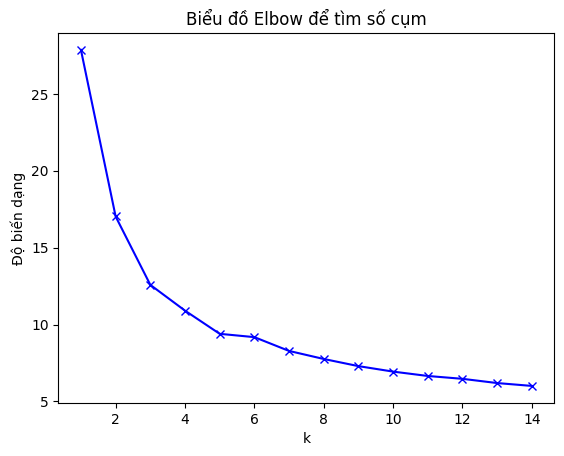

In [13]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import numpy as np

# Đọc dữ liệu từ tập tin CSV
data = pd.read_csv('D:\Office\Course\ML/redwine.csv')

# Chọn các thuộc tính muốn sử dụng để phân loại
X = data[['fixed acidity', 'volatile acidity','citric acid', 'residual sugar', 'chlorides', 
          'total sulfur dioxide', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]

# Số lượng cụm  muốn tạo 
num_clusters = 6

# Tạo mô hình K-Means
kmeans = KMeans(n_clusters=num_clusters)

# Thực hiện clustering trên dữ liệu
kmeans.fit(X)

# Thêm cột "Cluster" vào dataframe để lưu kết quả clustering
data['Cluster'] = kmeans.labels_

# In kết quả clustering
print(data[['fixed acidity', 'volatile acidity','citric acid', 'residual sugar', 
            'chlorides', 'total sulfur dioxide', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'Cluster']])

# Tìm ra 3 điểm trung tâm của các cụm
cluster_centers = kmeans.cluster_centers_

# Hiển thị biểu đồ phân loại dự đoán
plt.scatter(X['total sulfur dioxide'], X['free sulfur dioxide'], c=kmeans.labels_, cmap='rainbow')
plt.scatter(cluster_centers[:, 5], cluster_centers[:, 6], c='black', marker='x', s=100)  # Điểm trung tâm
plt.xlabel('total sulfur dioxide')
plt.ylabel('free sulfur dioxide')
plt.show()


print("Các điểm trung tâm của các cụm:")
for i, center in enumerate(cluster_centers):
    print(f"Cụm {i}: {center}")
# Tạo mô hình K-Means và thực hiện clustering trên dữ liệu ban đầu
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(X)

# Dữ liệu mới muốn dự đoán
new_data = pd.DataFrame({'fixed acidity': [5.1], 'volatile acidity': [0.9],'citric acid': [0.3], 'residual sugar': [5], 'chlorides': [0.7], 
                         'total sulfur dioxide': [80], 'free sulfur dioxide': [20], 'density': [0.99], 
                         'pH': [3.5], 'sulphates': [0.5], 'alcohol': [10]})

# Sử dụng mô hình K-Means đã huấn luyện để dự đoán cụm cho dữ liệu mới
predicted_cluster = kmeans.predict(new_data)

print("Dự đoán cụm cho dữ liệu mới:", predicted_cluster[0])

# Vẽ biểu đồ elbow
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Độ biến dạng')
plt.title('Biểu đồ Elbow để tìm số cụm')
plt.show()


In [12]:
import pandas as pd
from sklearn.cluster import KMeans

# Đọc dữ liệu từ tập tin CSV và tạo dataframe
data = pd.read_csv(r'D:\Office\Course\ML/userdata.csv')

# Chọn các thuộc tính muốn sử dụng để residual sugarân loại
X = data[['fixed acidity', 'volatile acidity','citric acid', 'residual sugar', 'chlorides', 'total sulfur dioxide', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]


# Số lượng cụm  muốn tạo (ở đây là 3 cụm tương ứng với 3 loài Iris)
num_clusters = 3

# Tạo mô hình K-Means và thực hiện clustering trên dữ liệu ban đầu
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(X)

# Dữ liệu mới muốn dự đoán
new_data = pd.DataFrame({'fixed acidity': [5.1], 'volatile acidity': [0.9],'citric acid': [0.3], 'residual sugar': [5], 'chlorides': [0.7], 'total sulfur dioxide': [80], 'free sulfur dioxide': [20], 'density': [0.99], 'pH': [3.5], 'sulphates': [0.5], 'alcohol': [10]})

# Sử dụng mô hình K-Means đã huấn luyện để dự đoán cụm cho dữ liệu mới
predicted_cluster = kmeans.predict(new_data)

print("Dự đoán cụm cho dữ liệu mới:", predicted_cluster[0])


C:\Users\1011s\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Dự đoán cụm cho dữ liệu mới: 0
